Linear Regression - Multiple Predictors
===
**Author: Abbas Aliyev**

Dataset: [Student Performance (Multiple Linear Regression)](https://www.kaggle.com/datasets/nikhil7280/student-performance-multiple-linear-regression)

In [14]:
import kagglehub
from pathlib import Path
import pandas as pd

# Download latest version
path = Path(kagglehub.dataset_download("nikhil7280/student-performance-multiple-linear-regression"))
print("Path to dataset files:", path)

# Load the dataset
df = pd.read_csv(path / "Student_Performance.csv")

# Display the first 5 rows
df.head()

Path to dataset files: C:\Users\User\.cache\kagglehub\datasets\nikhil7280\student-performance-multiple-linear-regression\versions\1


,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [15]:
# Explore the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [16]:
# Check for missing values
df.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [18]:
# Convert "Extracurricular Activities" to binary
df["Extracurricular Activities"] = df["Extracurricular Activities"].apply(lambda x: 1 if x == "Yes" else 0)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  int64  
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 468.9 KB


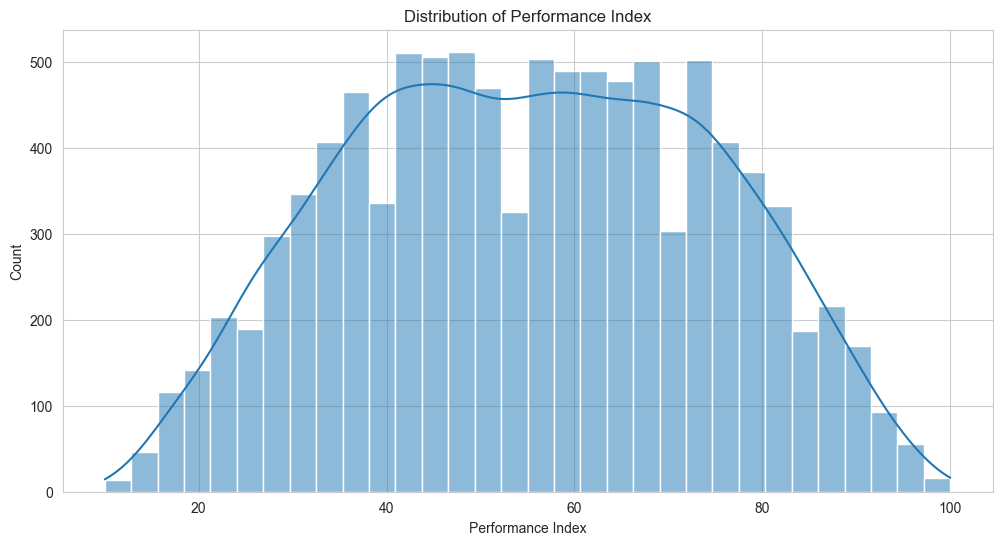

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the distribution of the target variable
plt.figure(figsize=(12, 6))
sns.histplot(df["Performance Index"], kde=True)
plt.title("Distribution of Performance Index")
plt.show()

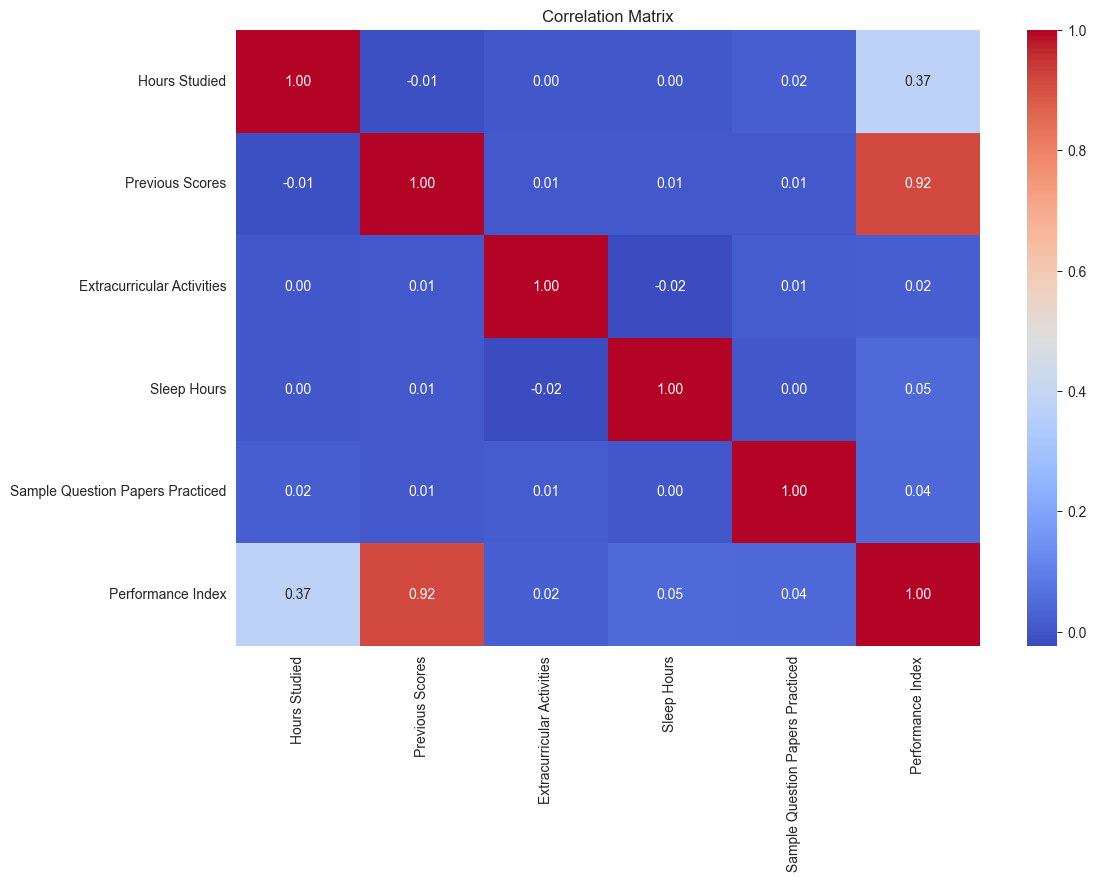

In [23]:
# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

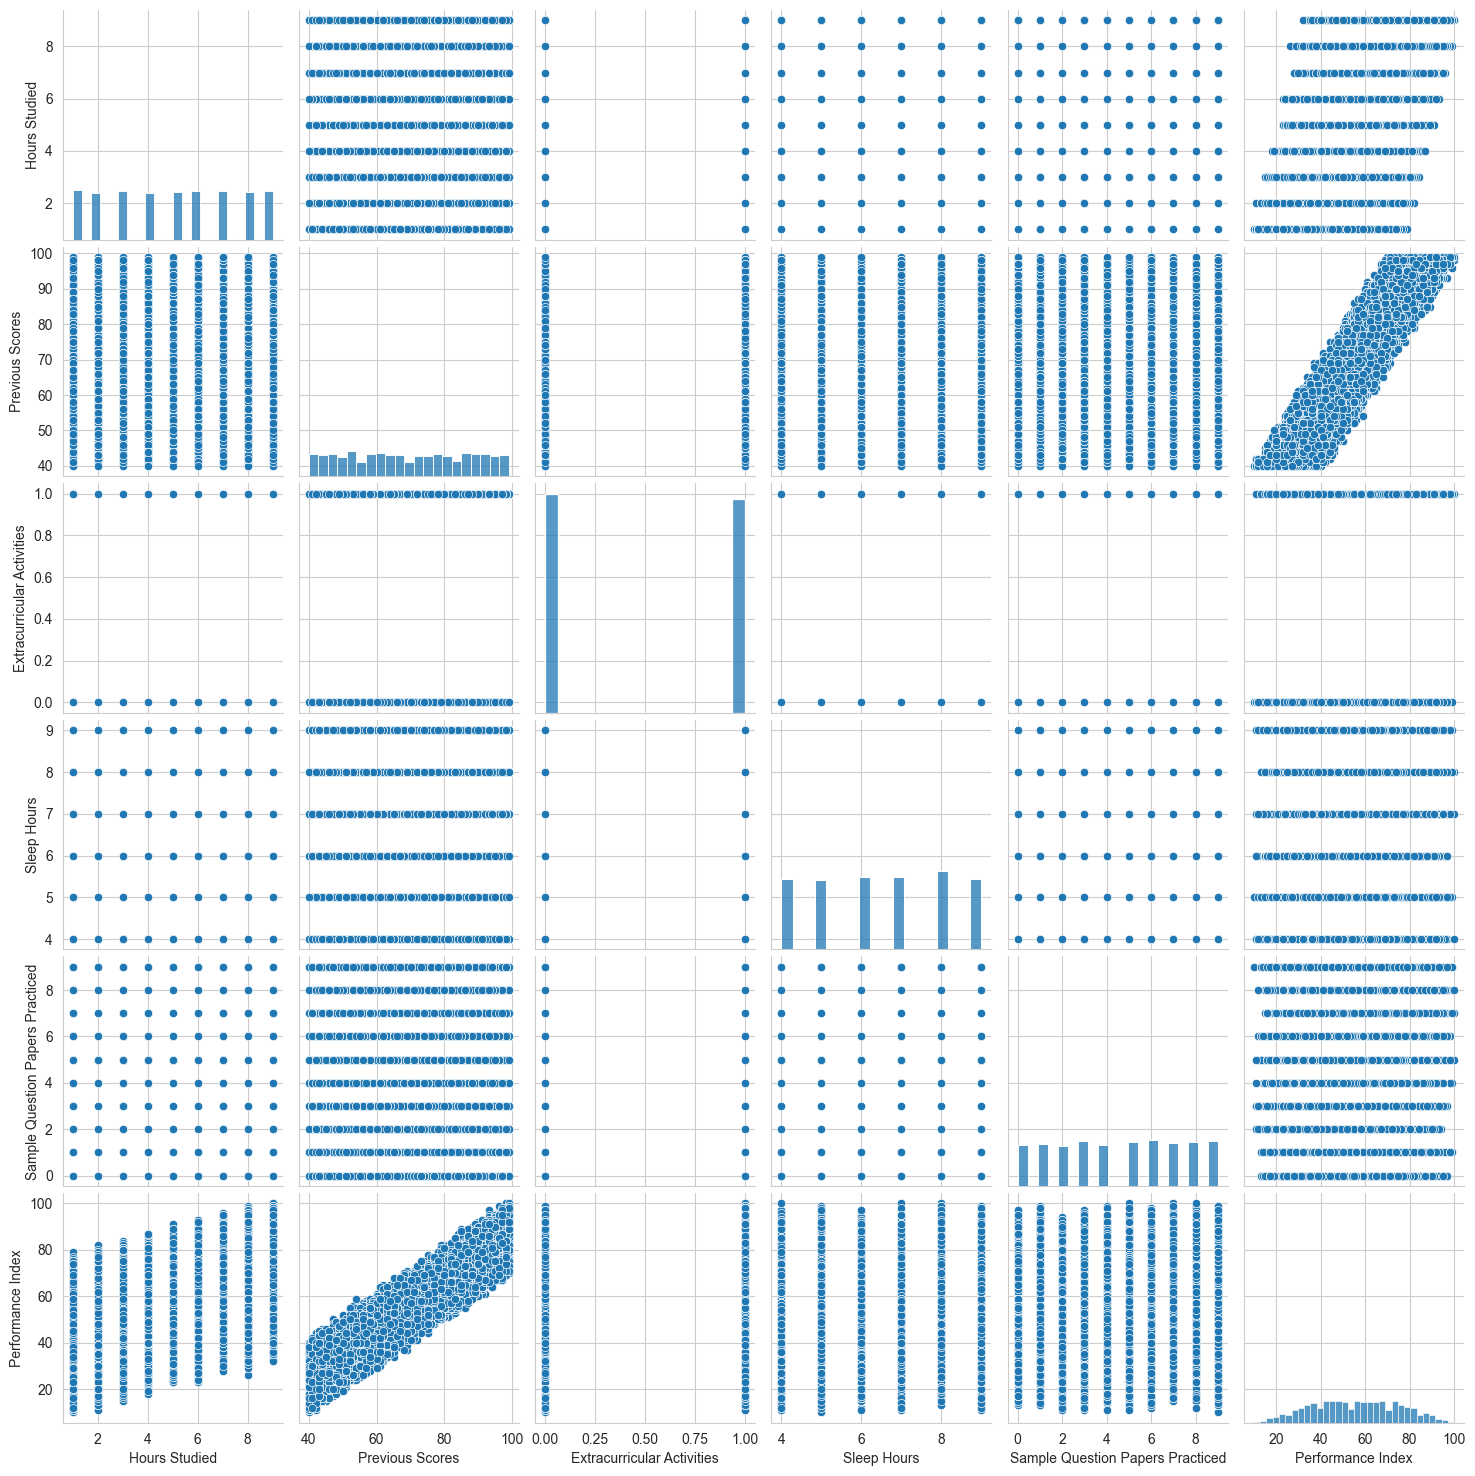

In [25]:
# Plot the pairplot
sns.pairplot(df)
plt.show()

In [20]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# Predictors: "Hours Studied", "Previous Scores", "Extracurricular Activities", "Sleep Hours", "Sample Question Papers Practiced"
# Target: "Performance Index"
X = df[["Hours Studied", "Previous Scores", "Extracurricular Activities", "Sleep Hours", "Sample Question Papers Practiced"]]
y = df["Performance Index"]

# Split the data into training and testing sets
def split_data(X, y, seed=42):
    return train_test_split(X, y, test_size=0.2, random_state=seed)

x_train, x_test, y_train, y_test = split_data(X, y)
print("Training data shape:", x_train.shape, y_train.shape)
print("Testing data shape:", x_test.shape, y_test.shape)

Training data shape: (8000, 5) (8000,)
Testing data shape: (2000, 5) (2000,)


In [21]:
# Create a Linear Regression model
model = LinearRegression()
model.fit(x_train, y_train)

# Make predictions
y_pred = model.predict(x_test)

# Evaluate the model
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = metrics.r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R^2 Score:", r2)

Mean Squared Error: 4.082628398521853
Root Mean Squared Error: 2.0205515085050054
R^2 Score: 0.9889832909573145


In [26]:
# Compare actual vs predicted values
results = pd.DataFrame({"Actual": y_test, "Predicted": y_pred})
results.head(10)

,Actual,Predicted
6252,51.0,54.711854
4684,20.0,22.615513
1731,46.0,47.903145
4742,28.0,31.289767
4521,41.0,43.004570
6340,59.0,59.071252
576,48.0,45.903475
5202,87.0,86.459118
6363,37.0,37.700140
439,73.0,72.055925


Text(0.5, 0, 'Actual')

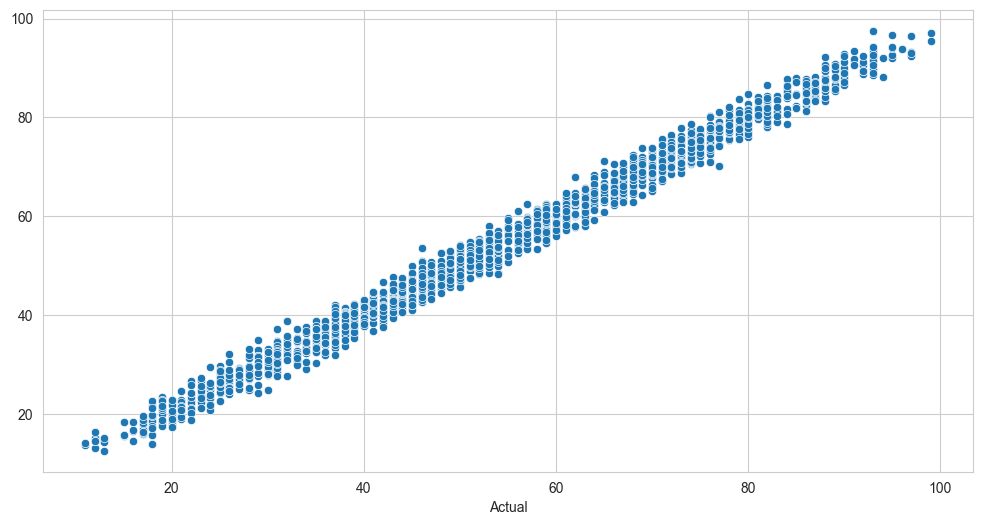

In [27]:
# Plot the actual vs predicted values
plt.figure(figsize=(12, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual")

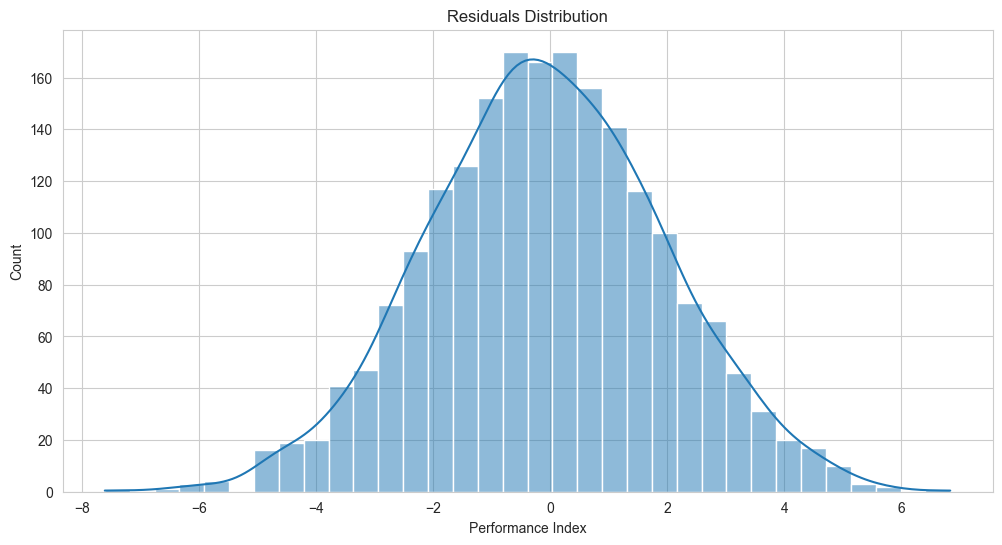

In [28]:
# Plot the residuals
plt.figure(figsize=(12, 6))
sns.histplot(y_test - y_pred, kde=True)
plt.title("Residuals Distribution")
plt.show()

In [29]:
# Coefficients
coefficients = pd.DataFrame(model.coef_, X.columns, columns=["Coefficient"])
coefficients

,Coefficient
Hours Studied,2.852484
Previous Scores,1.016988
Extracurricular Activities,0.608617
Sleep Hours,0.476941
Sample Question Papers Practiced,0.191831


In [30]:
# Try with normalized data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)
y_scaled = scaler.fit_transform(y.values.reshape(-1, 1))

x_train, x_test, y_train, y_test = split_data(X_scaled, y_scaled)

model = LinearRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = metrics.r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R^2 Score:", r2)

Mean Squared Error: 0.011061471626806851
Root Mean Squared Error: 0.10517353101806011
R^2 Score: 0.9889832909573145


In [31]:
# Compare actual vs predicted values
results = pd.DataFrame({"Actual": y_test.flatten(), "Predicted": y_pred.flatten()})

# Inverse transform the scaled values
results = scaler.inverse_transform(results)

results = pd.DataFrame(results, columns=["Actual", "Predicted"])
results.head(10)

,Actual,Predicted
0,51.0,54.711854
1,20.0,22.615513
2,46.0,47.903145
3,28.0,31.289767
4,41.0,43.004570
5,59.0,59.071252
6,48.0,45.903475
7,87.0,86.459118
8,37.0,37.700140
9,73.0,72.055925


In [32]:
# Coefficients
coefficients = pd.DataFrame(model.coef_.flatten(), X.columns, columns=["Coefficient"])
coefficients

,Coefficient
Hours Studied,0.384434
Previous Scores,0.918034
Extracurricular Activities,0.015839
Sleep Hours,0.042099
Sample Question Papers Practiced,0.028630


The normalized data did not improve the model performance, but the coefficients are now comparable.